In [1]:
import numpy as np

import nltk
from nltk.tokenize import word_tokenize

# keras Tokenizer and sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

#one-hot encoding
from keras.utils import to_categorical

# keras models and layers
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import Dense, Flatten,Dropout
from keras.optimizers import Adam,SGD
from keras.regularizers import l1,l2,l1_l2

from keras import backend as K

%matplotlib inline

Using TensorFlow backend.


In [11]:
# source text
data = """ Jack and Jill went up the hill\n
        To fetch a pail of water\n
        Jack fell down and broke his crown\n
        And Jill came tumbling after\n """
data2="aunque conseguido días realizando deporte vuelto ser incapaz mantener constancia llevo practicarlo"
print(len([data2]))

1


In [12]:
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data2])
encoded = tokenizer.texts_to_sequences([data2])[0]
print(encoded,len(encoded))
print(tokenizer.word_index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 12
{'aunque': 1, 'conseguido': 2, 'días': 3, 'realizando': 4, 'deporte': 5, 'vuelto': 6, 'ser': 7, 'incapaz': 8, 'mantener': 9, 'constancia': 10, 'llevo': 11, 'practicarlo': 12}


In [4]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 21


# Model 1: One-Word-In, One-Word-Out Sequences

In [5]:
# create word -> word sequences
sequences = []
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    print(sequence, end=' ')
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

[2, 1] [1, 3] [3, 4] [4, 5] [5, 6] [6, 7] [7, 8] [8, 9] [9, 10] [10, 11] [11, 12] [12, 13] [13, 2] [2, 14] [14, 15] [15, 1] [1, 16] [16, 17] [17, 18] [18, 1] [1, 3] [3, 19] [19, 20] [20, 21] Total Sequences: 24


In [6]:
# split into X and y elements
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]
print(X)

[ 2  1  3  4  5  6  7  8  9 10 11 12 13  2 14 15  1 16 17 18  1  3 19 20]


In [7]:
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size+1)

In [8]:
# define model 1
model1 = Sequential()
model1.add(Embedding(vocab_size+1, 10, input_length=1))
model1.add(LSTM(50))
model1.add(Dense(vocab_size+1, activation='softmax'))
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 10)             220       
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_1 (Dense)              (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# define model 2
from keras.models import Input,Model
from keras.utils import plot_model

# define input shape
il=1
vd=10
input_shape=(il,) 

# define model
In = Input(shape=input_shape)
krs_emb=Embedding(input_dim=vocab_size+1, output_dim=vd, input_length=il)(In)
H=(krs_emb)
H=LSTM(50)(H)
predictions=Dense(vocab_size+1, activation='softmax')(H)

model2 = Model(inputs=In, outputs=predictions)

print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 1, 10)             220       
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_2 (Dense)              (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# define model 3
model3 = Sequential()
model3.add(Embedding(vocab_size+1, 2, input_length=1))
model3.add(LSTM(50))
model3.add(Dense(vocab_size+1, activation='softmax'))
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1, 2)              44        
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                10600     
_________________________________________________________________
dense_3 (Dense)              (None, 22)                1122      
Total params: 11,766
Trainable params: 11,766
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# compile network 1
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model1.fit(X, y, epochs=500, verbose=0)

In [12]:
# compile network 2
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model2.fit(X, y, epochs=500, verbose=0)

In [13]:
# compile network 3
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model3.fit(X, y, epochs=1000, verbose=2)

Epoch 1/1000
 - 1s - loss: 3.0909 - acc: 0.0417
Epoch 2/1000
 - 0s - loss: 3.0906 - acc: 0.0833
Epoch 3/1000
 - 0s - loss: 3.0901 - acc: 0.0833
Epoch 4/1000
 - 0s - loss: 3.0895 - acc: 0.1250
Epoch 5/1000
 - 0s - loss: 3.0890 - acc: 0.1250
Epoch 6/1000
 - 0s - loss: 3.0885 - acc: 0.1250
Epoch 7/1000
 - 0s - loss: 3.0880 - acc: 0.1250
Epoch 8/1000
 - 0s - loss: 3.0875 - acc: 0.1250
Epoch 9/1000
 - 0s - loss: 3.0869 - acc: 0.1250
Epoch 10/1000
 - 0s - loss: 3.0864 - acc: 0.1250
Epoch 11/1000
 - 0s - loss: 3.0858 - acc: 0.1250
Epoch 12/1000
 - 0s - loss: 3.0853 - acc: 0.1250
Epoch 13/1000
 - 0s - loss: 3.0847 - acc: 0.1250
Epoch 14/1000
 - 0s - loss: 3.0842 - acc: 0.1250
Epoch 15/1000
 - 0s - loss: 3.0836 - acc: 0.1250
Epoch 16/1000
 - 0s - loss: 3.0830 - acc: 0.1250
Epoch 17/1000
 - 0s - loss: 3.0824 - acc: 0.1250
Epoch 18/1000
 - 0s - loss: 3.0818 - acc: 0.1250
Epoch 19/1000
 - 0s - loss: 3.0812 - acc: 0.1250
Epoch 20/1000
 - 0s - loss: 3.0806 - acc: 0.1250
Epoch 21/1000
 - 0s - loss: 3

In [14]:
# evaluate model 1
in_text = 'jill'
encoded=[tokenizer.word_index[in_text]]
encoded = np.array(encoded)
yhat = model1.predict_classes(encoded, verbose=0)
print(yhat)
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)

[19]
came


In [15]:
# evaluate model 2
in_text = 'jill'
encoded=[tokenizer.word_index[in_text]]
encoded = np.array(encoded)
print(encoded)
yhat = np.argmax(model2.predict(encoded, verbose=0),axis=1)
print(yhat)
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)

[3]
[4]
went


In [16]:
# evaluate model 3
in_text = 'jill'
encoded=[tokenizer.word_index[in_text]]
encoded = np.array(encoded)
print(encoded)
yhat = np.argmax(model3.predict(encoded, verbose=0),axis=1)
print(yhat)
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)

[3]
[4]
went


In [17]:
def generate_seq(model, tokenizer, seed_text, n_words,mt='Sequential'):
    in_text, result = seed_text, seed_text
    # generate a fixed number of words
    codes=[]
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = np.array(encoded)
        codes.append(encoded)
        # predict a word in the vocabulary
        if mt=='Sequential':
            yhat = model.predict_classes(encoded, verbose=0)
        else:
            yhat = np.argmax(model.predict(encoded, verbose=0),axis=1)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result,codes

In [18]:
result,codes=generate_seq(model1, tokenizer, 'Jack', 12)
print(result)
print(codes)

Jack and jill came tumbling after of water jack and jill came tumbling
[array([2]), array([1]), array([3]), array([19]), array([20]), array([21]), array([12]), array([13]), array([2]), array([1]), array([3]), array([19])]


In [19]:
result,codes=generate_seq(model2, tokenizer, 'Jack', 12,'Model')
print(result)
print(codes)

Jack and jill went up the hill to fetch a pail of water
[array([2]), array([1]), array([3]), array([4]), array([5]), array([6]), array([7]), array([8]), array([9]), array([10]), array([11]), array([12])]


In [20]:
result,codes=generate_seq(model3, tokenizer, 'Jack', 12)
print(result)
print(codes)

Jack and jill went up the hill to fetch a pail of water
[array([2]), array([1]), array([3]), array([4]), array([5]), array([6]), array([7]), array([8]), array([9]), array([10]), array([11]), array([12])]


# Extracción de Word Embeddings

In [21]:
# extract the embeddings
weights1 = model1.layers[0].get_weights()[0]
weights2 = model2.layers[1].get_weights()[0]
weights3 = model3.layers[0].get_weights()[0]
print(weights1.shape)
print(weights2.shape)
print(weights3.shape)

(22, 10)
(22, 10)
(22, 2)


# Pasos para extraer el vector por palabra:
<h3><ol>
<li>Paso 1: Recuperar el tokenizador que contiene el diccionario de palabras:códigos</li>
<li>Paso 2: Recuperar código por palabra</li>
<li>Paso 3: Pasar código por matriz de pesos para obtener el vector</li>
</ol></h3> 

In [22]:
# check models embeddings consistency
# same embedding must correspond to same word

inputs = [K.learning_phase()] + model2.inputs
w = K.function(inputs, [model2.layers[1].output])

matches=[]
for k in tokenizer.word_index.keys():    #paso 1
    found=False
    code = tokenizer.word_index[k]       #paso 2
    emb1 = weights1[code]                #paso 3
    for i in list(tokenizer.word_index.values()):
        if found==False:
            emb2 = w([0,i])[0]
            if emb1.all() == emb2.all():
                for j in tokenizer.word_index.keys():
                    if tokenizer.word_index[j]==code:
                        matches.append([k,j])
                        found=True
                        break
            if found:
                break
for i in matches:
    print(i)  #must be the same words in each case

['and', 'and']
['jack', 'jack']
['jill', 'jill']
['went', 'went']
['up', 'up']
['the', 'the']
['hill', 'hill']
['to', 'to']
['fetch', 'fetch']
['a', 'a']
['pail', 'pail']
['of', 'of']
['water', 'water']
['fell', 'fell']
['down', 'down']
['broke', 'broke']
['his', 'his']
['crown', 'crown']
['came', 'came']
['tumbling', 'tumbling']
['after', 'after']


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
vec = []
points = []
codes=[]
for k in tokenizer.word_index.keys():
    code = tokenizer.word_index[k]
    codes.append(code)
    emb3 = weights3[code]
    vec.append(emb3)
    points.append(k)
vec=np.array(vec)            

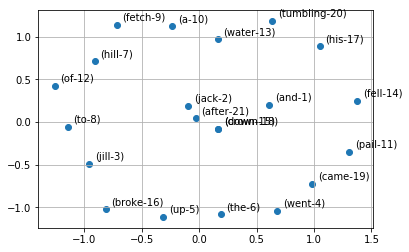

In [26]:
#visualize points

x=vec[:,0]
y=vec[:,1]

fig, ax = plt.subplots()
ax.scatter(x,y)
plt.grid()
for i, txt in enumerate(zip(points,codes)):
    label= '('+txt[0]+'-'+str(txt[1])+')'
    ax.annotate(label, (x[i]+.05, y[i]+.05))

In [123]:
unique, counts = np.unique(sequences, return_counts=True)
conteos=dict(zip(unique, counts))
print(conteos)
print(max(conteos, key=lambda key: conteos[key]))

{1: 6, 2: 3, 3: 4, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 1}
1


# Model 2: Line-by-Line Sequence
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;X,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;y
## _, _, _, _, _, Jack, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;and
## _, _, _, _, Jack, and &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Jill
## _, _, _, Jack, and, Jill, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;went
## _, _, Jack, and, Jill, went, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;up
## _, Jack, and, Jill, went, up,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the
## Jack, and, Jill, went, up, the, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;hill

In [30]:
# create line-based sequences
sequences = []
for line in data.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

 Jack and Jill went up the hill [2, 1, 3, 4, 5, 6, 7]
 []
        To fetch a pail of water [8, 9, 10, 11, 12, 13]
 []
        Jack fell down and broke his crown [2, 14, 15, 1, 16, 17, 18]
 []
        And Jill came tumbling after [1, 3, 19, 20, 21]
  []
[[2, 1], [2, 1, 3], [2, 1, 3, 4], [2, 1, 3, 4, 5], [2, 1, 3, 4, 5, 6], [2, 1, 3, 4, 5, 6, 7], [8, 9], [8, 9, 10], [8, 9, 10, 11], [8, 9, 10, 11, 12], [8, 9, 10, 11, 12, 13], [2, 14], [2, 14, 15], [2, 14, 15, 1], [2, 14, 15, 1, 16], [2, 14, 15, 1, 16, 17], [2, 14, 15, 1, 16, 17, 18], [1, 3], [1, 3, 19], [1, 3, 19, 20], [1, 3, 19, 20, 21]]
Total Sequences: 21


In [66]:
# pad input sequences
from keras.preprocessing import sequence

max_length = max([len(seq) for seq in sequences])
sequences = sequence.pad_sequences(sequences, maxlen=max_length, padding='pre')
print(sequences)

print('Max Sequence Length: %d' % max_length)

[[ 2  1  3]
 [ 1  3  4]
 [ 3  4  5]
 [ 4  5  6]
 [ 5  6  7]
 [ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]
 [10 11 12]
 [11 12 13]
 [12 13  2]
 [13  2 14]
 [ 2 14 15]
 [14 15  1]
 [15  1 16]
 [ 1 16 17]
 [16 17 18]
 [17 18  1]
 [18  1  3]
 [ 1  3 19]
 [ 3 19 20]
 [19 20 21]]
Max Sequence Length: 3


In [35]:
# split into input and output elements
sequences = np.array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size+1)
print(X)
print(y)

[[ 0  0  0  0  0  2]
 [ 0  0  0  0  2  1]
 [ 0  0  0  2  1  3]
 [ 0  0  2  1  3  4]
 [ 0  2  1  3  4  5]
 [ 2  1  3  4  5  6]
 [ 0  0  0  0  0  8]
 [ 0  0  0  0  8  9]
 [ 0  0  0  8  9 10]
 [ 0  0  8  9 10 11]
 [ 0  8  9 10 11 12]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  2 14]
 [ 0  0  0  2 14 15]
 [ 0  0  2 14 15  1]
 [ 0  2 14 15  1 16]
 [ 2 14 15  1 16 17]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  3]
 [ 0  0  0  1  3 19]
 [ 0  0  1  3 19 20]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0

In [37]:
# define model
model1 = Sequential()
model1.add(Embedding(vocab_size, 10, input_length=max_length-1))
model1.add(LSTM(50))
model1.add(Dense(vocab_size+1, activation='softmax'))
print(model1.summary())
# compile network
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model1.fit(X, y, epochs=500, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 6, 10)             210       
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_5 (Dense)              (None, 22)                1122      
Total params: 13,532
Trainable params: 13,532
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
 - 1s - loss: 3.0904 - acc: 0.0476
Epoch 2/500
 - 0s - loss: 3.0889 - acc: 0.0476
Epoch 3/500
 - 0s - loss: 3.0875 - acc: 0.0952
Epoch 4/500
 - 0s - loss: 3.0859 - acc: 0.0952
Epoch 5/500
 - 0s - loss: 3.0842 - acc: 0.0952
Epoch 6/500
 - 0s - loss: 3.0825 - acc: 0.0952
Epoch 7/500
 - 0s - loss: 3.0808 - acc: 0.0952
Epoch 8/500
 - 0s - loss: 3.0790 - acc: 0.0952
Epoch 9/500
 - 0s - l

In [45]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    print(in_text)
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        print(encoded)
        # pre-pad sequences to a fixed length
        encoded = sequence.pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text

In [54]:
# evaluate model
print(generate_seq(model1, tokenizer, max_length-1, 'To fetch a', 3))

To fetch a
[8, 9, 10]
[8, 9, 10, 11]
[8, 9, 10, 11, 12]
To fetch a pail of water


In [55]:
print(generate_seq(model1, tokenizer, max_length-1, 'And Jill', 3))

And Jill
[1, 3]
[1, 3, 19]
[1, 3, 19, 20]
And Jill came tumbling after


# Model 3: Two-Words-In, One-Word-Out Sequence

In [67]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
    seq = encoded[i-2:i+1]
    sequences.append(seq)
print(sequences)

[[2, 1, 3], [1, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8], [7, 8, 9], [8, 9, 10], [9, 10, 11], [10, 11, 12], [11, 12, 13], [12, 13, 2], [13, 2, 14], [2, 14, 15], [14, 15, 1], [15, 1, 16], [1, 16, 17], [16, 17, 18], [17, 18, 1], [18, 1, 3], [1, 3, 19], [3, 19, 20], [19, 20, 21]]


In [69]:
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = sequence.pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
# split into input and output elements
sequences = np.array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size+1)
# define model
model = Sequential()
model.add(Embedding(vocab_size+1, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size+1, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)

Max Sequence Length: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 2, 10)             220       
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_6 (Dense)              (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
 - 1s - loss: 3.0917 - acc: 0.0000e+00
Epoch 2/500
 - 0s - loss: 3.0910 - acc: 0.0000e+00
Epoch 3/500
 - 0s - loss: 3.0902 - acc: 0.0870
Epoch 4/500
 - 0s - loss: 3.0894 - acc: 0.0870
Epoch 5/500
 - 0s - loss: 3.0885 - acc: 0.0870
Epoch 6/500
 - 0s - loss: 3.0876 - acc: 0.0870
Epoch 7/500
 - 0s - loss: 3.0867 - acc: 0.0870
Epoch 8/500
 - 0s - loss: 3.0859 - ac

In [70]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Jack and', 5))
print(generate_seq(model, tokenizer, max_length-1, 'And Jill', 3))
print(generate_seq(model, tokenizer, max_length-1, 'fell down', 5))
print(generate_seq(model, tokenizer, max_length-1, 'pail of', 5))

Jack and
[2, 1]
[2, 1, 3]
[2, 1, 3, 4]
[2, 1, 3, 4, 5]
[2, 1, 3, 4, 5, 6]
Jack and jill went up the hill
And Jill
[1, 3]
[1, 3, 4]
[1, 3, 4, 5]
And Jill went up the
fell down
[14, 15]
[14, 15, 1]
[14, 15, 1, 16]
[14, 15, 1, 16, 17]
[14, 15, 1, 16, 17, 18]
fell down and broke his crown and
pail of
[11, 12]
[11, 12, 13]
[11, 12, 13, 2]
[11, 12, 13, 2, 14]
[11, 12, 13, 2, 14, 15]
pail of water jack fell down and
